In [102]:
%matplotlib inline

In [103]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
df = pd.read_csv('df_skill_div.csv')

In [104]:
df.columns

Index(['date', 'job_title', 'company', 'reviews', 'location', 'skills'], dtype='object')

In [105]:
list(df.head())

['date', 'job_title', 'company', 'reviews', 'location', 'skills']

In [106]:
cat_list=['job_title',
 'company',
 'location',
 'skills']

In [107]:
df_noskill = df.drop(['skills'], axis=1)

In [108]:
skill_list = list(df_skill.columns)
skill_list[:5]

['skill_.Net', 'skill_3G', 'skill_4G/LTE', 'skill_ACH', 'skill_ADAS']

In [109]:
df_skill = df['skills'].str.get_dummies(sep=', ')

In [110]:
df_skill = df_skill.add_prefix('skill_')

In [111]:
df_skill.head()

,skill_.Net,skill_3G,skill_4G/LTE,skill_ACH,skill_ADAS,skill_AI,skill_AJAX,skill_APICS Certification,skill_AWS,skill_Accounting,skill_Acquisition Strategy,skill_Active Directory,skill_Adobe Acrobat,skill_Adobe Creative Suite,skill_Adobe InDesign,skill_Adobe Marketing,skill_Adobe Photoshop,skill_Affiliate Marketing,skill_Agriculture,skill_Akka,skill_Alteryx,skill_Analysis Skills,skill_Android,skill_Angular,skill_Ansible,skill_Ant,skill_Apache,skill_Application Support,skill_ArcGIS,skill_Audits,skill_Aviation Experience,skill_Azure,skill_B2B Sales,skill_BGP,skill_Basic Computer Skills,skill_Big Data,skill_Bilingual,skill_Bioinformatics,skill_Biostatistics,skill_Bootstrap,skill_Build Automation,skill_Business Analysis,skill_Business Intelligence,skill_Business Management,skill_Business Process Reengineering,skill_C#,skill_C/C++,skill_CAD,skill_CAD Software,skill_CCDA,skill_CCNA,skill_CCNA Security,skill_CCNP,skill_CDISC Standards,skill_CEH,skill_CFE,skill_CGMP,skill_CI,skill_CI/CD,skill_CISM,skill_CISSP,skill_CPA,skill_CPHQ,skill_CPT Coding,skill_CSS,skill_CSSLP,skill_Calculus,skill_Calibration,skill_Cassandra,skill_Cell Biology,skill_CentOS,skill_Cerner,skill_Certified Compensation Professional,skill_Certified Information Systems Auditor,skill_Certified Internal Auditor,skill_Certified Management Accountant,skill_Certified Scrum Master,skill_Change Management,skill_Chartered Financial Analyst,skill_Chef,skill_Cisco Routers,skill_Clean Driving Record,skill_Clinical Research,skill_Clinical Trials,skill_Clojure,skill_Cloud Computing,skill_CompTIA Network+,skill_CompTIA Security+,skill_Compliance Management,skill_Conflict Management,skill_Confluence,skill_Content Management Systems,skill_Continuous Improvement,skill_Control-M,skill_Conversion Optimization,skill_Cordova,skill_Crystal Reports,skill_Customer Segmentation,skill_Customer Service,skill_Cybersecurity,skill_DB2,skill_DHCP,skill_DNS,skill_Data Analysis,skill_Data Management,skill_Data Mining,skill_Data Science,skill_Data Warehouse,skill_Database Administration,skill_Database Marketing,skill_Design Controls,skill_Design Experience,skill_Design Patterns,skill_Digital Marketing,skill_DoD 8570,skill_Docker,skill_Doubleclick,skill_Drupal,skill_DynamoDB,skill_E-Commerce,skill_ERP Systems,skill_Eclipse,skill_Elasticsearch,skill_Ellucian,skill_Email Marketing,skill_Embedded Software,skill_Ember,skill_Enrolled Agent,skill_Epic,skill_Epic Certification,skill_Epidemiology,skill_Erlang,skill_Excel,skill_Experimental Design,skill_FIPS,skill_FISMA,skill_FPGA,skill_FTP,skill_Facebook Advertising,skill_FedRAMP,skill_FileMaker,skill_Financial Accounting,skill_Financial Modeling,skill_Firewall,skill_Fortran,skill_Front-End Development,skill_GAAP,skill_GIS,skill_GSEC,skill_Genetics,skill_Git,skill_Go,skill_Google AdWords,skill_Google Analytics,skill_Google Cloud Platform,skill_Google Search Console,skill_Google Suite,skill_Grant Writing,skill_GraphQL,skill_HBase,skill_HP ALM,skill_HTML5,skill_HTTPS,skill_Hadoop,skill_Haskell,skill_Heroku,skill_Hibernate,skill_Hive,skill_HubSpot,skill_Hyperion,skill_IAT,skill_IAT Level I,skill_IAT Level II,skill_ICD-10,skill_ICD-9,skill_ICU,skill_IDS,skill_IFRS,skill_IIS,skill_IPsec,skill_ISO 9001,skill_IT Experience,skill_ITIL,skill_IVR,skill_IaaS,skill_Image Processing,skill_InVision,skill_Informatica,skill_Information Security,skill_Integrated Library System,skill_Intelligence Experience,skill_Internal Audits,skill_JBoss,skill_JD Edwards,skill_JNCIA,skill_JSON,skill_Java,skill_JavaScript,skill_Jenkins,skill_Jira,skill_Juniper,skill_Kafka,skill_Kanban,skill_Kubernetes,skill_LAMP Stack,skill_LDAP,skill_LMS,skill_Laboratory Experience,skill_Leadership Experience,skill_Lean,skill_Lean Manufacturing,skill_Linux,skill_Load Balancing,skill_Lua,skill_Lucene,skill_MATLAB,skill_MCITP,skill_MCP,skill_MCSA,skill_MCSD,skill_MCSE,skill_MCTS,skill_MPLS,skill_Mac OS,skill_Machine Learning,skill_Magento,skill_Managed Care,skill_Management Consulting,skill_Management Experien

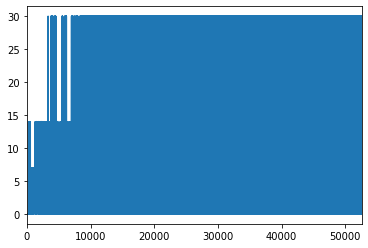

In [112]:
df['date'].plot()

In [113]:
df.head()

,date,job_title,company,reviews,location,skills
0,0,Machine Lubrication Analyst,"Coeur Mining, Inc.",0,Alaska,"R, MCP"
1,0,FILE CLERK,Mobile County Public Schools,184,"Mobile County, AL",NaN
2,0,Performance Improvement - Data Analyst,Yukon-Kuskokwim Health Corporation,0,"Bethel, AK 99559",NaN
3,0,Store Worker,US Department of Defense,"4,937","Redstone Arsenal, AL",NaN
4,0,Academic Tutor,AmeriCorps,"2,426",Alaska,NaN


In [117]:
df['reviews'] = df['reviews'].fillna(0)

In [118]:
df_noskill.describe(include='all')

,date,job_title,company,reviews,location
count,52580.000000,52580,43708,52580,51102
unique,NaN,20142,12147,2606,6539
top,NaN,Data Analyst,U.S. Census Bureau,0,United States
freq,NaN,759,240,18617,1581
mean,15.140091,NaN,NaN,NaN,NaN
std,12.283584,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN
25%,3.000000,NaN,NaN,NaN,NaN
50%,14.000000,NaN,NaN,NaN,NaN
75%,30.000000,NaN,NaN,NaN,NaN


- for loop loc
- skill dummy concat
- job title word cloud

In [120]:
df_noskill_dum = pd.get_dummies(df_noskill)

In [12]:
df_new = pd.concat([df_noskill_dum,df_skill], axis=1)

In [13]:
df_new = pd.concat([df_noskill_dum,df_skill], axis=1)

In [14]:
df_new2 = pd.concat([df['Salary1'].to_frame(),df_new],axis=1)

In [15]:
df_skill_only = pd.concat([df['Salary2'],df_skill], axis=1)

In [16]:
df_skill_only.dropna(inplace=True)

In [17]:
df_new2.dropna(inplace=True)

In [18]:
#df_new.to_csv(r'df_new.csv')

In [19]:
df_new.columns[5:11]

Index(['Sal__100000-119999', 'Sal__120000-139999', 'Sal__140000-159999',
       'Sal__80000-99999', 'Sal__less than80000', 'Sal__more than160000'],
      dtype='object')

In [20]:
feature_name = list(df_skill_only.drop(columns=['Salary2']).columns)

In [21]:
df_new2['Salary1'].unique()

array(['less than80000', '80000-99999', '100000-119999', '120000-139999',
       '140000-159999', 'more than160000'], dtype=object)

In [22]:
X = df_skill_only.drop(columns=['Salary2'])
y = df_skill_only['Salary2']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
def feature_sampling_scores (max_features_list):
    feature_sampling_scores_list = []
    for max_feature in max_features_list:
        rfr = RandomForestRegressor(max_features=max_feature, random_state=1,n_estimators=10)
        rfr.fit(X_train, y_train)
        score = (max_feature, rfr.score(X_val,y_val))
        feature_sampling_scores_list.append(score)
    return feature_sampling_scores_list

In [25]:
feature_sampling_scores([0.5,'log2','sqrt',None])

[(0.5, 0.40566906960645754),
 ('log2', 0.45071854640391573),
 ('sqrt', 0.45821799142058295),
 (None, 0.41668072720939753)]

### Feature Importances

In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 6, max_features=0.5, min_samples_leaf=8).fit(X_train, y_train)

In [27]:
rfr.score(X_val, y_val)

0.37592754747931134

In [28]:
importance_numbers = rfr.feature_importances_
importance_list = importance_numbers.tolist()
importances = np.vstack((feature_name, importance_list))
importances = pd.Series(importance_list, index = feature_name)
importances.sort_values(ascending=False)

skill_Machine Learning                                0.255237
skill_Spark                                           0.173893
skill_Hadoop                                          0.077626
skill_Python                                          0.072897
skill_AWS                                             0.047134
skill_Excel                                           0.036818
skill_SQL                                             0.029879
skill_Microsoft Office                                0.023432
skill_Tableau                                         0.021867
skill_Data Mining                                     0.017889
skill_R                                               0.016540
skill_Scala                                           0.014982
skill_Java                                            0.014073
skill_Leadership Experience                           0.012396
skill_HBase                                           0.011228
skill_Data Analysis                                   0

In [33]:
importances.to_frame().to_csv('skill_importances.csv')

In [ ]:
import xgboost as xgb

X = df_skill_only.drop(columns=['Salary2'])
y = df_skill_only['Salary2']

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=200, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


### Decision trees as base learners

In [ ]:
from sklearn.metrics import mean_squared_error
X = df_new2[feature_name]
y = df_new2['Salary2']

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor()

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

### Linear base learners

In [ ]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

### Evaluating model quality

In [ ]:
# Create the DMatrix: housing_dmatrix
dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

### Visualizing individual XGBoost trees

### Visualizing feature importances: What features are most important in my dataset

In [ ]:
X = df_skill_only.drop(columns=['Salary2'])
y = df_skill_only['Salary2']

# Create the parameter dictionary: params
params = {"objective":"reg:linear","max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=xgb.DMatrix(data=X, label=y), num_boost_round=10)

In [ ]:
# Plot the feature importances
from matplotlib import pyplot as plt

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams["figure.figsize"] = (50,15)
plt.show()

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

In [ ]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix,num_boost_round=50,metrics='rmse',as_pandas=True, seed=123, params=params)

# Print cv_results
print(cv_results)

### XGBoost hyperparameters 

In [ ]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix,
    params=params, nfold=5, num_boost_round=10, metrics='rmse',as_pandas=True,seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

### Tuning max_depth

In [ ]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:linear"}

# Create list of max_depth values
max_depths = [2,5,10,20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["rmse"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix,
    params=params, nfold=5, num_boost_round=10, metrics='rmse',as_pandas=True,seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

### Tuning colsample_bytree

Now, it's time to tune "colsample_bytree". You've already seen this if you've ever worked with scikit-learn's RandomForestClassifier or RandomForestRegressor, where it just was called max_features. In both xgboost and sklearn, this parameter (although named differently) simply specifies the fraction of features to choose from at every split in a given tree. In xgboost, colsample_bytree must be specified as a float between 0 and 1.

In [ ]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:linear","max_depth":3}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1,0.5,0.8,1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params['rmse'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

### Encoding categorical columns I: LabelEncoder
Now that you've seen what will need to be done to get the housing data ready for XGBoost, let's go through the process step-by-step.

First, you will need to fill in missing values - as you saw previously, the column LotFrontage has many missing values. Then, you will need to encode any categorical columns in the dataset using one-hot encoding so that they are encoded numerically. You can watch this video from Supervised Learning with scikit-learn for a refresher on the idea.

The data has five categorical columns: MSZoning, PavedDrive, Neighborhood, BldgType, and HouseStyle. Scikit-learn has a LabelEncoder function that converts the values in each categorical column into integers. You'll practice using this here.

In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
df.LotFrontage = df['LotFrontage'].fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == object)

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())

### Encoding categorical columns III: DictVectorizer
Alright, one final trick before you dive into pipelines. The two step process you just went through - LabelEncoder followed by OneHotEncoder - can be simplified by using a DictVectorizer.

Using a DictVectorizer on a DataFrame that has been converted to a dictionary allows you to get label encoding as well as one-hot encoding in one go.

Your task is to work through this strategy in this exercise!

In [ ]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df_skill_only.to_dict('records')

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)

### Preprocessing within a pipeline

Now that you've seen what steps need to be taken individually to properly process the Ames housing data, let's use the much cleaner and more succinct DictVectorizer approach and put it alongside an XGBoostRegressor inside of a scikit-learn pipeline.

In [ ]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

X = df_new2[feature_name]
y = df_new2['Salary2']

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict('records'),y)

### Cross-validating your XGBoost model

In this exercise, you'll go one step further by using the pipeline you've created to preprocess and cross-validate your model.

In [ ]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:linear"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline,X.to_dict('records'),y,cv=10,scoring='neg_mean_squared_error')

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))